In [1]:
from keras.datasets import imdb 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
import numpy as np 
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences): 
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data) 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
partial_train_data = x_train[:15000]
partial_train_labels=y_train[:15000]
partial_test_data = x_train[15000:25000]
partial_test_labels = y_train[15000:25000]

In [4]:
from keras import models 
from keras import layers
from keras import regularizers

model = models.Sequential() 
model.add(layers.Dense(32,activation='relu', input_shape=(10000,))) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32,activation='relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
t_val=partial_train_data[:10000]
partial_t_train=partial_train_data[10000:]
l_val=partial_train_labels[:10000]
partial_l_train=partial_train_labels[10000:]

In [7]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(partial_t_train,partial_l_train,epochs=20,batch_size=512,validation_data=(t_val,l_val))

Train on 5000 samples, validate on 10000 samples
Epoch 1/20
5000/5000 [==============================] - 2s 418us/step - loss: 0.6807 - acc: 0.5532 - val_loss: 0.6251 - val_acc: 0.7574
Epoch 2/20
5000/5000 [==============================] - 2s 326us/step - loss: 0.5960 - acc: 0.6986 - val_loss: 0.5285 - val_acc: 0.8270
Epoch 3/20
5000/5000 [==============================] - 2s 340us/step - loss: 0.5187 - acc: 0.7854 - val_loss: 0.4547 - val_acc: 0.8484
Epoch 4/20
5000/5000 [==============================] - 2s 356us/step - loss: 0.4360 - acc: 0.8302 - val_loss: 0.3977 - val_acc: 0.8556
Epoch 5/20
5000/5000 [==============================] - 2s 336us/step - loss: 0.3648 - acc: 0.8730 - val_loss: 0.3683 - val_acc: 0.8565
Epoch 6/20
5000/5000 [==============================] - 2s 335us/step - loss: 0.3122 - acc: 0.8926 - val_loss: 0.3630 - val_acc: 0.8453
Epoch 7/20
5000/5000 [==============================] - 2s 330us/step - loss: 0.2701 - acc: 0.9142 - val_loss: 0.3211 - val_acc: 0.8693

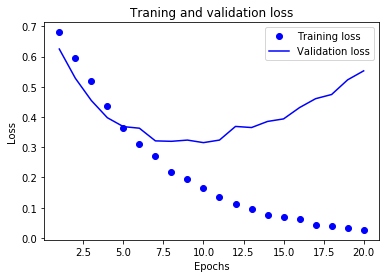

In [8]:
import matplotlib.pyplot as plt 
history_dict = history.history 
loss = history_dict['loss'] 
val_loss = history_dict['val_loss'] 
epochs = range(1, len(loss) + 1) 
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Traning and validation loss')
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.legend() 
plt.show() 

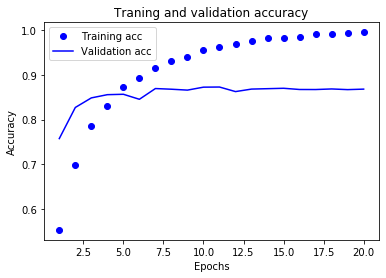

In [9]:
plt.clf()
acc = history_dict['acc'] 
val_acc = history_dict['val_acc'] 

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Traning and validation accuracy')
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.legend() 
plt.show() 

In [10]:
from keras import models 
from keras import layers
model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(partial_train_data,partial_train_labels,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)

Epoch 1/4
15000/15000 [==============================] - 2s 131us/step - loss: 0.5406 - accuracy: 0.7765
Epoch 2/4
15000/15000 [==============================] - 2s 122us/step - loss: 0.3263 - accuracy: 0.9007
Epoch 3/4
15000/15000 [==============================] - 2s 122us/step - loss: 0.2370 - accuracy: 0.9233
Epoch 4/4
25000/25000 [==============================] - 4s 160us/step


In [11]:
results

[0.29355840931892396, 0.8837199807167053]